using langgraph, need to define nodes and graphs for my usecase. start --> chatbot & LLM --> END
state management & definitions

In [1]:
%pip install --upgrade langchain-core>=0.2.27
%pip install --upgrade langgraph langsmith langchain_community langchain_groq
# need to use open_ai or anthropic api and then import here  

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import langchain_core
import langgraph
import langsmith
import langchain_community
import langchain_groq

print(f"langchain-core version: {langchain_core.__version__}")
#print(f"langgraph version: {langgraph.__version__}")
print(f"langsmith version: {langsmith.__version__}")
print(f"langchain_community version: {langchain_community.__version__}")
#print(f"langchain_groq version: {langchain_groq.__version__}")

langchain-core version: 0.2.33
langsmith version: 0.1.100
langchain_community version: 0.2.12


In [3]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_API_KEY"] = os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_PROJECT"] = os.getenv("LANGCHAIN_PROJECT")

In [4]:
from langchain_groq import ChatGroq

In [5]:
llm = ChatGroq(model_name = "llama-3.1-70b-versatile")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000002C1696A59D0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000002C1696A6480>, model_name='llama-3.1-70b-versatile', groq_api_key=SecretStr('**********'))

## start building the chatbot

In [6]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [7]:
class State(TypedDict):
    # Messages have the type "list". the add_messages funtion in annotation defines how this state key should be updated
    # (in this case, in appends messages to the list, rather that overwriting them)
   messages: Annotated[list, add_messages]
   
graph_builder = StateGraph(State)

In [8]:
graph_builder

In [9]:
def chatbot(state: State):
    return {"messages":llm.invoke(state['messages'])}

In [10]:
graph_builder.add_node("chatbot", chatbot)

In [11]:
graph_builder

In [13]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)


In [14]:
graph = graph_builder.compile()

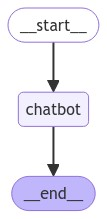

In [17]:
from IPython.display import Image, display
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [19]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit","q"]:
        print("Adios")
        break
    for event in graph.stream({'messages':("user", user_input)}):
        print(event.values())
        for value in event.values():
            print(value['messages'])
            print("Assitant:", value["messages"].content)

dict_values([{'messages': AIMessage(content="It's nice to meet you. Is there something I can help you with or would you like to chat?", response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 36, 'total_tokens': 59, 'completion_time': 0.092, 'prompt_time': 0.008141867, 'queue_time': 0.005869872999999999, 'total_time': 0.100141867}, 'model_name': 'llama-3.1-70b-versatile', 'system_fingerprint': 'fp_b3ae7e594e', 'finish_reason': 'stop', 'logprobs': None}, id='run-17eb53a2-8c15-416d-a0e3-ec069b3dd761-0', usage_metadata={'input_tokens': 36, 'output_tokens': 23, 'total_tokens': 59})}])
content="It's nice to meet you. Is there something I can help you with or would you like to chat?" response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 36, 'total_tokens': 59, 'completion_time': 0.092, 'prompt_time': 0.008141867, 'queue_time': 0.005869872999999999, 'total_time': 0.100141867}, 'model_name': 'llama-3.1-70b-versatile', 'system_fingerprint': 'fp_b3ae7e

KeyboardInterrupt: Interrupted by user